<a href="https://colab.research.google.com/github/naqirraza99/Cryptography/blob/main/2022574_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cryptography CY-312**
## **Assignment # 02**

## **Name: Syed Muhammad Naqi Raza**
## **Reg No: 2022574**

##**DES Algorithm**

The Data Encryption Standard (DES) is a symmetric-key algorithm for the encryption of digital data. Developed in the early 1970s by IBM and later adopted by the National Institute of Standards and Technology (NIST) as a federal standard for encrypting non-classified information, DES played a pivotal role in the field of cryptography for several decades. Although it has been superseded by more secure algorithms like the Advanced Encryption Standard (AES), understanding DES is fundamental for grasping the principles of modern encryption techniques.

DES is a block cipher, meaning it encrypts data in fixed-size blocks—in the case of DES, 64-bit blocks. It operates using a symmetric-key approach, where the same key is used for both encryption and decryption. DES transforms plaintext into ciphertext through a series of complex operations involving permutations, substitutions, and key mixing over multiple rounds.

The provided Python script implements the Data Encryption Standard (DES) algorithm using the PyCryptodome library. DES is a symmetric-key algorithm used for encrypting and decrypting data. This script allows users to encrypt a plaintext message and subsequently decrypt it using DES in Cipher Block Chaining (CBC) mode with PKCS5 padding for secure encryption.

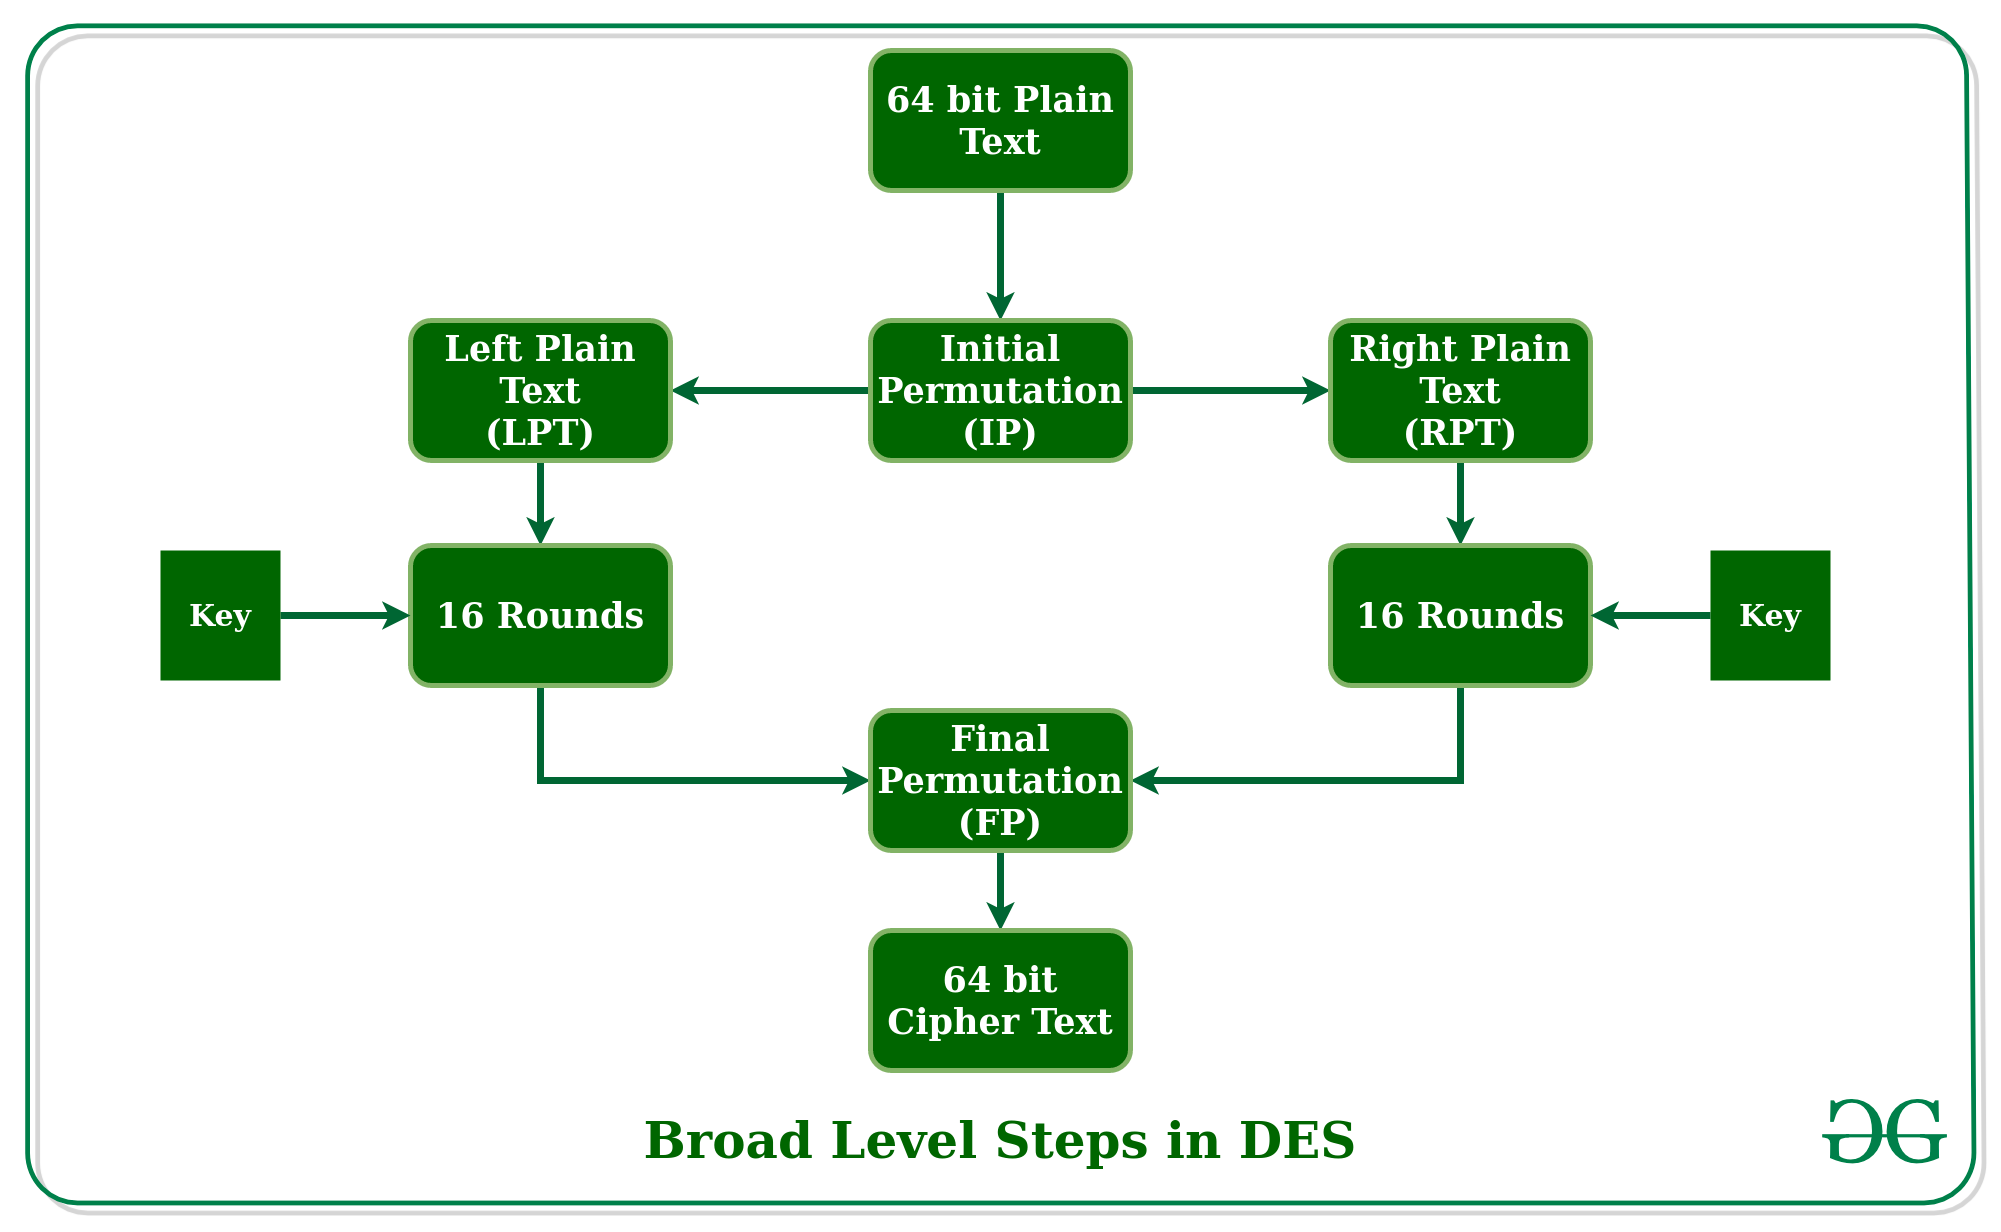

**Implementation**

In [ ]:
!pip install pycryptodome
from Crypto.Cipher import DES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes

# DES uses 8-byte (64-bit) keys
key_size = 8
block_size = 8  # Block size for DES is 8 bytes

# Function to encrypt data using DES
def des_encrypt(plaintext, key):
    cipher = DES.new(key, DES.MODE_ECB)  # DES in ECB mode (no IV needed)
    padded_text = pad(plaintext.encode('utf-8'), block_size)  # Pad plaintext to be multiple of 8 bytes
    ciphertext = cipher.encrypt(padded_text)
    return ciphertext

# Function to decrypt data using DES
def des_decrypt(ciphertext, key):
    cipher = DES.new(key, DES.MODE_ECB)  # DES in ECB mode (same key and mode used as encryption)
    decrypted_padded_text = cipher.decrypt(ciphertext)
    decrypted_text = unpad(decrypted_padded_text, block_size)  # Remove padding to get original plaintext
    return decrypted_text.decode('utf-8')

# Main program for user input and DES encryption/decryption
if __name__ == "__main__":
    message = input("Enter the message to encrypt: ")

    # Generate a random 8-byte DES key
    key = get_random_bytes(key_size)
    print(f"Generated DES Key (hex): {key.hex()}")

    encrypted_message = des_encrypt(message, key)
    print(f"Encrypted Message (hex): {encrypted_message.hex()}")

    decrypted_message = des_decrypt(encrypted_message, key)
    print(f"Decrypted Message: {decrypted_message}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.0 MB/s eta 0:00:00
Enter the message to encrypt: Naqi Raza studies Cryptography
Generated DES Key (hex): a793a6a9a613f5a3
Encrypted Message (hex): 3abdf30da8e0eab42b9fc7a790d10a5582fbced61d43bd80327f5416528cf8d2
Decrypted Message: Naqi Raza studies Cryptography


**Libraries and Dependencies**

**PyCryptodome:** A self-contained Python package of low-level cryptographic primitives.

*   **Installation:** Ensure PyCryptodome is installed using **pip install pycryptodome.**

**binascii:** A standard Python library for converting between binary and ASCII.

**Explanation of the Code**

**Key Generation:**
get_random_bytes(8) generates an 8-byte random key (64 bits) since DES requires a key of exactly 8 bytes.

**Padding:**
DES encrypts data in blocks of 8 bytes, so the pad function ensures the plaintext is padded to be a multiple of 8 bytes. The unpad function removes this padding after decryption to retrieve the original message.

**Modes:**
The code uses ECB (Electronic Codebook) mode for encryption, which is simple but less secure because it encrypts identical plaintext blocks into identical ciphertext blocks. In practice, more secure modes like CBC are recommended.

**Encryption/Decryption:**
The des_encrypt function encrypts the padded plaintext, while des_decrypt decrypts the ciphertext back to the original message after removing the padding.

##**IDEA Algorithm**

The International Data Encryption Algorithm (IDEA) is a symmetric-key block cipher designed for secure data encryption. Developed in the early 1990s by Xuejia Lai and James Massey, IDEA was intended to provide a robust alternative to the Data Encryption Standard (DES) with enhanced security features.

The International Data Encryption Algorithm (IDEA) is a symmetric-key block cipher that encrypts data in 64-bit blocks using a 128-bit key. IDEA is known for its strength and resistance to various cryptanalytic attacks.

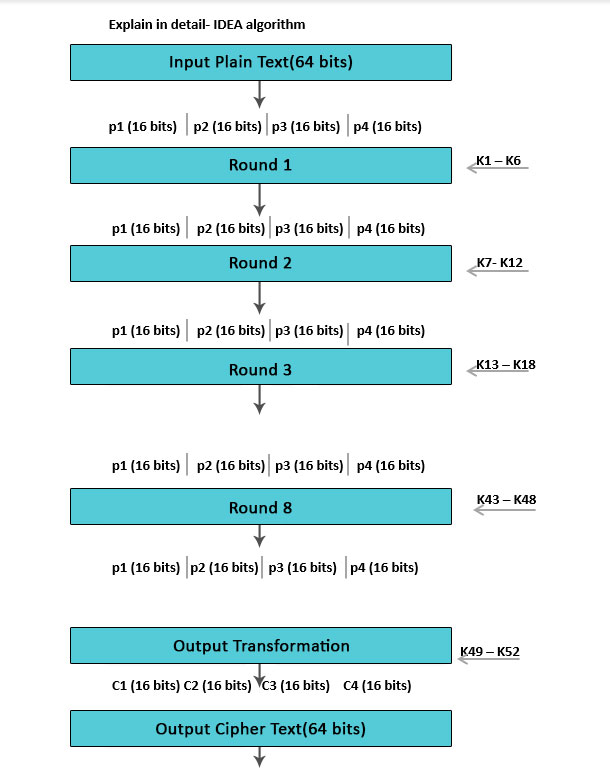

**Implementation**

In [ ]:
# Helper function for 16-bit modular multiplication
def mul(x, y):
    if x == 0:
        x = 0x10000
    if y == 0:
        y = 0x10000
    result = (x * y) % 0x10001
    if result == 0x10000:
        result = 0
    return result

# Function to compute modular inverse modulo 0x10001 (65537)
def mod_inverse(x):
    if x == 0:
        return 0
    else:
        # Use Extended Euclidean Algorithm to find inverse modulo 65537
        return pow(x, 0xFFFF, 0x10001)

# Key schedule to generate the 52 16-bit subkeys
def key_schedule(key):
    keys = []
    for i in range(8):
        # Split 128-bit key into 8x16-bit blocks
        keys.append((key >> (112 - i * 16)) & 0xFFFF)
    for i in range(8, 52):
        if (i % 8) == 0:
            key = ((key << 25) & 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF) | (key >> 103)
        keys.append((key >> (112 - (i % 8) * 16)) & 0xFFFF)
    return keys

# Generate decryption subkeys from encryption subkeys
def generate_decryption_keys(encryption_keys):
    decryption_keys = [0] * 52
    # Inverse of the first round's keys
    decryption_keys[48] = mod_inverse(encryption_keys[0])
    decryption_keys[49] = (0x10000 - encryption_keys[1]) % 0x10000
    decryption_keys[50] = (0x10000 - encryption_keys[2]) % 0x10000
    decryption_keys[51] = mod_inverse(encryption_keys[3])

    # For the middle 6 rounds, reverse the key schedule
    for i in range(1, 8):
        decryption_keys[48 - i * 6] = mod_inverse(encryption_keys[i * 6])
        decryption_keys[49 - i * 6] = (0x10000 - encryption_keys[i * 6 + 2]) % 0x10000
        decryption_keys[50 - i * 6] = (0x10000 - encryption_keys[i * 6 + 1]) % 0x10000
        decryption_keys[51 - i * 6] = mod_inverse(encryption_keys[i * 6 + 3])
        decryption_keys[46 - i * 6] = encryption_keys[i * 6 + 4]
        decryption_keys[47 - i * 6] = encryption_keys[i * 6 + 5]

    return decryption_keys

# The IDEA encryption process
def idea_encrypt(block, keys):
    # Split the 64-bit data block into four 16-bit words
    x1 = (block >> 48) & 0xFFFF
    x2 = (block >> 32) & 0xFFFF
    x3 = (block >> 16) & 0xFFFF
    x4 = block & 0xFFFF

    # IDEA has 8 rounds and one output transformation
    for round in range(8):
        x1 = mul(x1, keys[round * 6])
        x2 = (x2 + keys[round * 6 + 1]) % 0x10000
        x3 = (x3 + keys[round * 6 + 2]) % 0x10000
        x4 = mul(x4, keys[round * 6 + 3])

        # Mix the middle two values
        t1 = x1 ^ x3
        t2 = x2 ^ x4
        t1 = mul(t1, keys[round * 6 + 4])
        t2 = (t2 + t1) % 0x10000
        t2 = mul(t2, keys[round * 6 + 5])
        t1 = (t1 + t2) % 0x10000

        # Swap values for next round
        x1 ^= t2
        x4 ^= t2
        x2 ^= t1
        x3 ^= t1

        if round != 7:
            x2, x3 = x3, x2  # Swap the middle two values after every round except the last one

    # Output transformation
    x1 = mul(x1, keys[48])
    x2 = (x2 + keys[49]) % 0x10000
    x3 = (x3 + keys[50]) % 0x10000
    x4 = mul(x4, keys[51])

    # Combine the final values into a 64-bit block
    return (x1 << 48) | (x2 << 32) | (x3 << 16) | x4

# The IDEA decryption process
def idea_decrypt(block, keys):
    return idea_encrypt(block, keys)  # Encryption and decryption are the same in IDEA

# Example usage
if __name__ == "__main__":
    # Example 128-bit key (can be any 128-bit integer)
    key = 0x0123456789ABCDEF0123456789ABCDEF

    # 64-bit data block (plaintext or ciphertext)
    block = 0x0123456789ABCDEF

    # Generate encryption subkeys
    encryption_subkeys = key_schedule(key)

    # Encrypt the block
    encrypted_block = idea_encrypt(block, encryption_subkeys)
    print(f"Encrypted block: {hex(encrypted_block)}")

    # Generate decryption subkeys from the encryption subkeys
    decryption_subkeys = generate_decryption_keys(encryption_subkeys)

    # Decrypt the block
    decrypted_block = idea_decrypt(encrypted_block, decryption_subkeys)
    print(f"Decrypted block: {hex(decrypted_block)}")



Encrypted block: 0xaef2ddf1b7484fd4
Decrypted block: 0x162e8f482c85af53


**Explanation of the Code**

**Modular Multiplication:**
The mul function performs multiplication modulo 0x10001 (65537). In IDEA, multiplicative and additive mixing are key operations for data obfuscation, and IDEA specifically uses modular multiplication by 65537 to ensure that the values stay within the required 16-bit limit.

**Key Schedule:**
The key_schedule function generates 52 subkeys, each 16 bits long, from the 128-bit key. These subkeys are extracted by splitting the main key into 16-bit blocks and rotating it to create additional subkeys. These 52 subkeys are distributed across 8 encryption rounds and the final output transformation.

**Encryption:**
The idea_encrypt function takes a 64-bit block of data and the generated subkeys to encrypt the block. It goes through 8 rounds of encryption, which involves multiplicative and additive operations on the four 16-bit words, along with XOR operations for further mixing. After the 8 rounds, an output transformation step finalizes the encryption by applying the last set of subkeys.

**Decryption:**
The idea_decrypt function reverses the key schedule and uses the same idea_encrypt function for decryption. This is possible because IDEA encryption and decryption follow the same process but with reversed subkeys. The generate_decryption_keys function creates the decryption keys by reversing and applying the modular inverses of the encryption keys.

**Key & Block:**
A 128-bit key and a 64-bit data block are provided as an example. The data block is first encrypted using the idea_encrypt function with the generated encryption subkeys. Then, using the generated decryption subkeys, the data is decrypted to confirm the original block is correctly recovered.

##**Advanced Encryption Standard**

AES (Advanced Encryption Standard) is a widely used symmetric encryption algorithm, established by the U.S. National Institute of Standards and Technology (NIST) in 2001 as the replacement for the older DES (Data Encryption Standard). AES is known for its security, speed, and efficiency, making it the encryption standard for sensitive data worldwide, such as financial transactions, wireless communication, and government data protection.

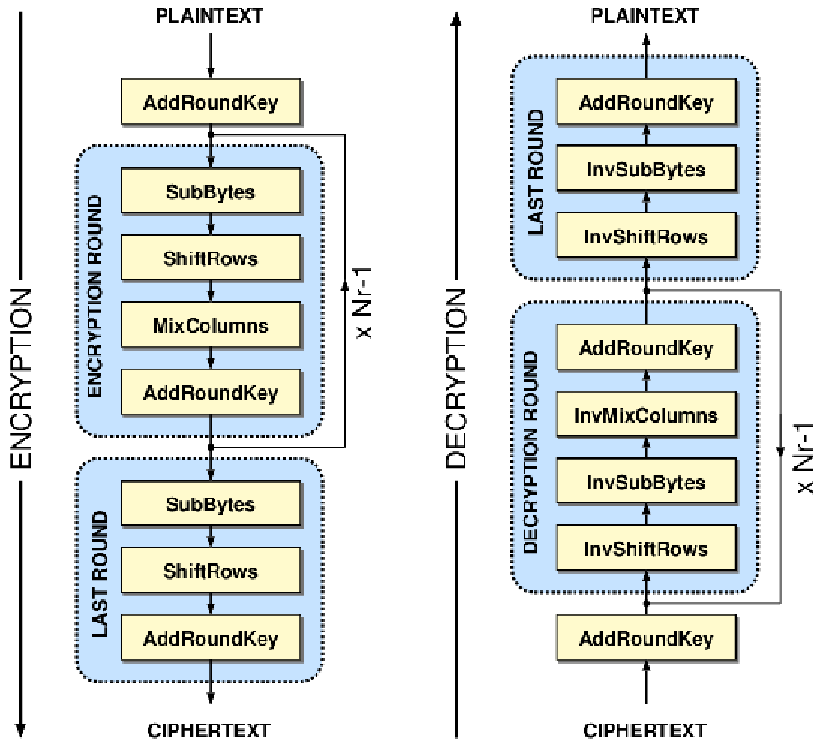

**Implementation**

In [ ]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad

# AES block size is 16 bytes (128 bits)
BLOCK_SIZE = 16

# Function to encrypt data using AES (CBC mode)
def aes_encrypt(plaintext, key):
    # Generate a random initialization vector (IV)
    iv = get_random_bytes(BLOCK_SIZE)

    # Create AES cipher object with the key and IV in CBC mode
    cipher = AES.new(key, AES.MODE_CBC, iv)

    # Pad the plaintext to a multiple of 16 bytes (block size)
    padded_text = pad(plaintext.encode('utf-8'), BLOCK_SIZE)

    # Encrypt the padded plaintext
    ciphertext = cipher.encrypt(padded_text)

    # Return the IV + ciphertext (concatenated)
    return iv + ciphertext

# Function to decrypt data using AES (CBC mode)
def aes_decrypt(ciphertext, key):
    # Extract the IV from the first 16 bytes of the ciphertext
    iv = ciphertext[:BLOCK_SIZE]

    # Extract the actual ciphertext
    ciphertext = ciphertext[BLOCK_SIZE:]

    # Create AES cipher object with the key and IV in CBC mode
    cipher = AES.new(key, AES.MODE_CBC, iv)

    # Decrypt the ciphertext
    decrypted_padded_text = cipher.decrypt(ciphertext)

    # Unpad the decrypted data to get the original plaintext
    decrypted_text = unpad(decrypted_padded_text, BLOCK_SIZE)

    # Return the decrypted plaintext
    return decrypted_text.decode('utf-8')

if __name__ == "__main__":
    # Generate a 256-bit (32-byte) AES key
    key = get_random_bytes(32)

    message = "This is a secret message."

    encrypted_message = aes_encrypt(message, key)
    print(f"Encrypted (hex): {encrypted_message.hex()}")

    decrypted_message = aes_decrypt(encrypted_message, key)
    print(f"Decrypted: {decrypted_message}")


Encrypted (hex): 85e627be1c8d3907a440ed378f46d18607554055a12ebb2b374696dcb8c567c652eb075bbdc064d1f43221d63ae87ee0
Decrypted: This is a secret message.


**Libraries and Dependencies**


**PyCryptodome:** A self-contained Python package of low-level cryptographic primitives.

*    **Installation:** Ensure PyCryptodome is installed using **pip install pycryptodome**.





**Explaination of the Code**

**Key Generation:**

The AES key is generated using get_random_bytes(32), which produces a 256-bit (32-byte) random key. AES supports key sizes of 128 bits (16 bytes), 192 bits (24 bytes), and 256 bits (32 bytes), and here, we're using the 256-bit key for AES-256 encryption.

**Initialization Vector (IV):**

In CBC mode, an Initialization Vector (IV) is required to ensure that identical plaintext blocks do not result in identical ciphertext blocks. The IV is generated randomly using get_random_bytes(BLOCK_SIZE), where BLOCK_SIZE = 16 (since AES works with 128-bit blocks). The IV is unique for each encryption operation to enhance security.

**Padding:**

AES requires the input data to be a multiple of the block size (16 bytes). If the plaintext message is not a multiple of 16 bytes, it is padded using the pad function from Crypto.Util.Padding. This function ensures the data is padded to the next multiple of 16 bytes. After decryption, the unpad function is used to remove the padding and retrieve the original plaintext message.

**Encryption:**

The aes_encrypt function takes the plaintext and key, and then performs encryption:

1. A random IV is generated.
The plaintext is padded using the pad function to ensure its length is a multiple of the AES block size (16 bytes).
2. An AES cipher object is created using the AES.new(key, AES.MODE_CBC, iv) method, which sets up the AES algorithm in CBC mode with the generated IV.
3. The padded plaintext is encrypted using the cipher.encrypt(padded_text) method.
4. The function returns the concatenation of the IV and the encrypted ciphertext, since the IV is necessary for decryption and must be passed along with the ciphertext.

**Decryption:**

The aes_decrypt function performs the reverse of the encryption process:
1. The IV is extracted from the first 16 bytes of the ciphertext.
The actual ciphertext is extracted by removing the IV.
2. A new AES cipher object is created using the same key and extracted IV (AES.new(key, AES.MODE_CBC, iv)).
3. The ciphertext is decrypted using cipher.decrypt(ciphertext).
4. The decrypted data is padded, so it’s unpadded using unpad to return the original plaintext message.

##**ECB (Electronic Codebook)**

ECB (Electronic Codebook) Mode is a block cipher encryption mode where the plaintext is divided into fixed-size blocks, and each block is independently encrypted with the same key. It is one of the simplest and oldest modes of operation for block ciphers, such as AES.

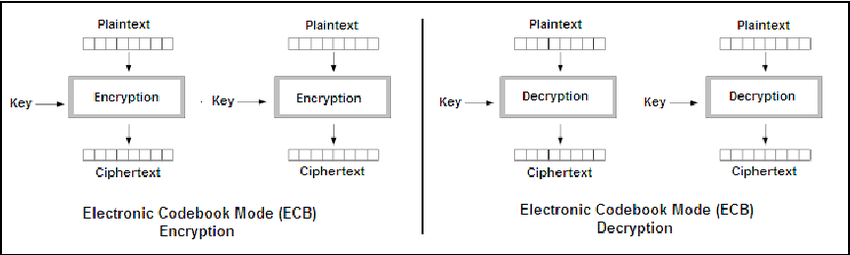

**Implementation**

In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes

# AES block size is 16 bytes (128 bits)
BLOCK_SIZE = 16

# Function to encrypt data using AES (ECB mode)
def aes_ecb_encrypt(plaintext, key):
    cipher = AES.new(key, AES.MODE_ECB)  # Create AES cipher in ECB mode
    padded_text = pad(plaintext.encode('utf-8'), BLOCK_SIZE)  # Pad plaintext to block size
    ciphertext = cipher.encrypt(padded_text)
    return ciphertext

# Function to decrypt data using AES (ECB mode)
def aes_ecb_decrypt(ciphertext, key):
    cipher = AES.new(key, AES.MODE_ECB)  # Create AES cipher in ECB mode
    decrypted_padded_text = cipher.decrypt(ciphertext)
    decrypted_text = unpad(decrypted_padded_text, BLOCK_SIZE)  # Unpad to get original plaintext
    return decrypted_text.decode('utf-8')

if __name__ == "__main__":
    # Generate a 256-bit AES key
    key = get_random_bytes(32)

    message = "This is a secret message in ECB mode."

    encrypted_message = aes_ecb_encrypt(message, key)
    print(f"ECB Encrypted (hex): {encrypted_message.hex()}")

    decrypted_message = aes_ecb_decrypt(encrypted_message, key)
    print(f"ECB Decrypted: {decrypted_message}")


ECB Encrypted (hex): 1d871bfe11c2f204d724bdc9c705483843176843b252ed8ec612cab5a6b57a07eb5e5c0bf44210cd3c753ecba3739f5d
ECB Decrypted: This is a secret message in ECB mode.


**Libraries and Dependencies**

**get_random_bytes:**
This function is essential for generating secure random values, such as cryptographic keys and initialization vectors (IVs). In ECB mode, an IV is not used; however, secure key generation remains crucial for maintaining the security of the encryption process.

**pad/unpad:**
These functions are integral to managing data that does not naturally conform to block sizes. The pad function adds necessary bytes to ensure compliance with AES's block size requirements, while the unpad function removes these bytes after decryption, allowing for recovery of the original message without any extraneous data.

**Explanation of the Code**

**Padding:**
AES (Advanced Encryption Standard) operates on fixed-size blocks of data, specifically 16 bytes. To ensure that the plaintext conforms to this requirement, a padding function is applied. This function adds extra bytes to the plaintext so that its length becomes a multiple of the block size. Common padding schemes include PKCS#7, which appends bytes equal to the number of padding bytes needed.

**Encryption:**
In Electronic Codebook (ECB) mode, each block of plaintext is encrypted independently. This means that identical plaintext blocks will produce identical ciphertext blocks. While this characteristic can lead to efficiency in encryption, it also introduces significant security vulnerabilities, especially when encrypting large datasets with repetitive patterns. An attacker could exploit these patterns to gain insights into the plaintext.

**Decryption:**
Decryption in ECB mode involves reversing the encryption process. Once the ciphertext is decrypted back into its original block format, the padding that was added during encryption must be removed. This is accomplished using an unpad function, which strips away the extra bytes and recovers the original plaintext message.

##**CTR (Counter Mode)**

CTR (Counter) mode is a widely used block cipher mode that transforms a block cipher into a stream cipher. It offers several advantages, including parallel processing capabilities and the ability to handle arbitrary plaintext lengths without requiring padding.

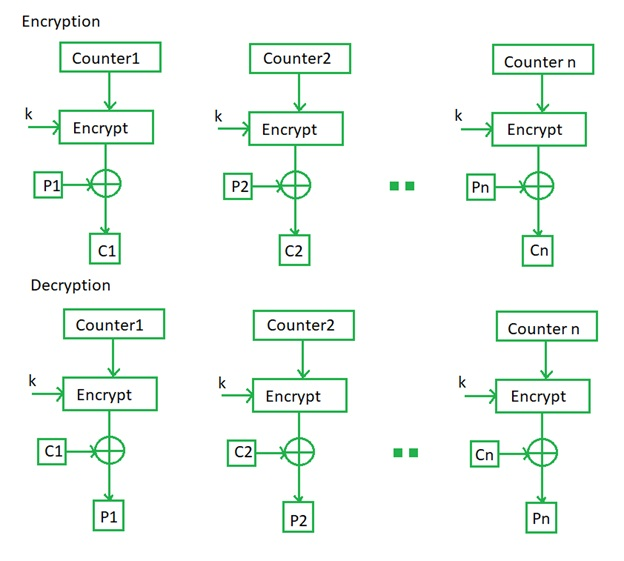

**Implementation**

In [ ]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes

# Function to encrypt data using AES (CTR mode)
def aes_ctr_encrypt(plaintext, key):
    cipher = AES.new(key, AES.MODE_CTR)  # Create AES cipher in CTR mode
    ciphertext = cipher.encrypt(plaintext.encode('utf-8'))
    return cipher.nonce, ciphertext  # Return nonce and ciphertext (nonce is needed for decryption)

# Function to decrypt data using AES (CTR mode)
def aes_ctr_decrypt(ciphertext, key, nonce):
    cipher = AES.new(key, AES.MODE_CTR, nonce=nonce)  # Create AES cipher in CTR mode with nonce
    decrypted_text = cipher.decrypt(ciphertext)
    return decrypted_text.decode('utf-8')

if __name__ == "__main__":
    # Generate a 256-bit AES key
    key = get_random_bytes(32)

    message = "This is a secret message in CTR mode."

    nonce, encrypted_message = aes_ctr_encrypt(message, key)
    print(f"CTR Encrypted (hex): {encrypted_message.hex()}")

    decrypted_message = aes_ctr_decrypt(encrypted_message, key, nonce)
    print(f"CTR Decrypted: {decrypted_message}")


CTR Encrypted (hex): aedd9a2a8412a1b71e787f735a448c65bd1ebdb51404f062003149fd8fee3435a17e7ef6b4
CTR Decrypted: This is a secret message in CTR mode.


**Libraries and Dependencies**

**AES:**
The AES library is utilized to implement AES encryption in CTR mode. It provides the necessary functions to generate keystreams and perform both encryption and decryption operations seamlessly.

**get_random_bytes:**
This function is essential for generating secure random values, including cryptographic keys and nonces. In CTR mode, secure random generation of nonces is vital to prevent vulnerabilities associated with nonce reuse.

**Explaination of the Code**

**Nonce:**
In CTR (Counter) mode, a nonce (number used once) is generated automatically to ensure that each encryption operation is unique. This nonce, combined with an internal counter, is crucial for the encryption process. During decryption, the same nonce must be provided to correctly synchronize the operations and recover the original plaintext.

**Encryption:**
CTR mode transforms AES into a stream cipher, allowing data to be encrypted one bit at a time. This method eliminates the need for padding, as it can handle plaintexts of any length directly. The encryption process involves generating a keystream by encrypting the nonce and counter values, which is then XORed with the plaintext to produce the ciphertext.

**Decryption:**
Decryption in CTR mode relies on the same nonce and key used during encryption. The nonce ensures that the keystream generated during decryption matches that of the encryption phase. By XORing the ciphertext with this keystream, the original plaintext can be accurately recovered.